In [1]:
import tensorflow as tf
import matplotlib.pylab as plt

2023-10-30 15:36:04.638003: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-30 15:36:04.638039: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-30 15:36:04.638073: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 15:36:04.647756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 15:36:06.304616: W tensorflow/compiler/

## Creating Data to view and fit

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

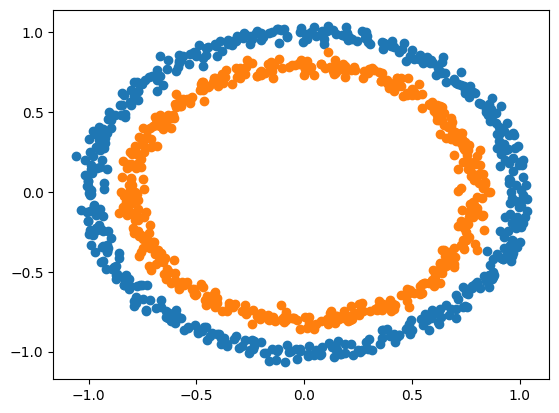

In [3]:
class1 = X[y == 0]
class2 = X[y == 1]
class1.shape

plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])

In [4]:
X_train = tf.constant(X)
y_train = tf.constant(y)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.binary_accuracy],
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.1 * (1/(epoch+1)))

history = model.fit(X, y, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6804 - binary_accuracy: 0.5350 - lr: 0.1000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5017 - binary_accuracy: 0.8010 - lr: 0.0500
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2430 - binary_accuracy: 0.9620 - lr: 0.0333
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1255 - binary_accuracy: 0.9900 - lr: 0.0250
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0886 - binary_accuracy: 0.9950 - lr: 0.0200
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0668 - binary_accuracy: 0.9960 - lr: 0.0167
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0516 - binary_accuracy: 0.9950 - lr: 0.0143
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0442 - binary_accuracy: 0.9960 - lr: 0.0125
Epoch 9/100
32/32 [=============================

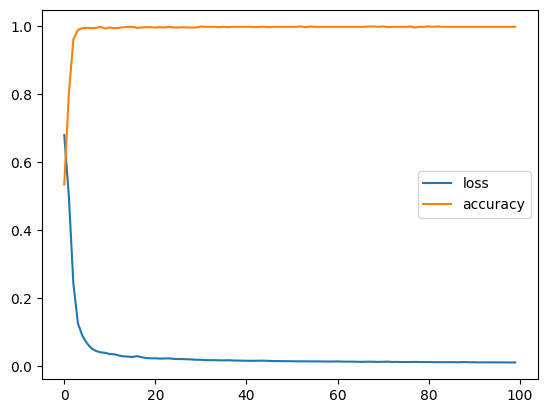

In [15]:
loss = history.history["loss"]
acc = history.history["binary_accuracy"]

plt.plot(history.epoch, loss, label="loss")
plt.plot(history.epoch, acc, label="accuracy")
plt.legend()

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):

    x_min, x_max = X[:,0].min() -.1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() -.1, X[:,1].max() + .1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step


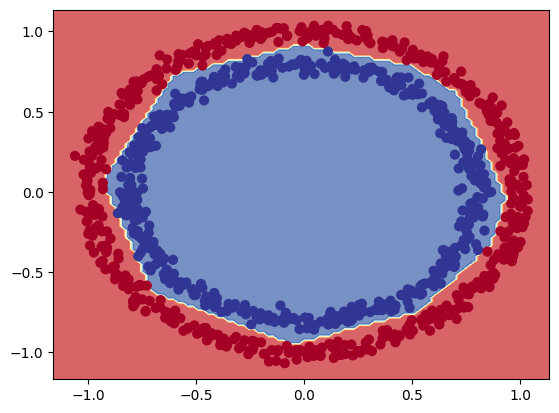

In [17]:
plot_decision_boundary(model, X, y)